# Problem 1: Too much choices given to Salad Stop's customers

#### Summary:
Salad Stop currently provides a wide variety of ingredients, dressings and toppings for their customers to choose from. As a result, this creates a problem whereby too much choices are given to their customers which is a potential turn-off to them. As a solution, we created a "Salad Suggester" which is essentially a linear optimizer which generates a salad which maximizes profits given a set of constraints/requirements set by Salad Stop's customer.

#### References:
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3493371
https://www.stern.nyu.edu/sites/default/files/assets/documents/Anisha%20Patel_Thesis_Honors%202014.pdf

## Descriptive Analytics

In this section, we will prove the relationship between choices and how it influences the purchase probability of a consumer. We will artificially generate a fake dataset which will be a simplified version of the dataset used in the "Too Little or Too Much Seller Assortment: The Effects on Buyers’ Purchase Probabilities in a Food Sharing Platform" research paper.

In [1]:
"""
Import Libraries
"""

import pandas as pd
import numpy as np
import math
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import random
from faker import Faker
import os  
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
SEED = 0
Faker.seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
"""
Use python's Faker libary to artificially generate fake data.
"""
fake = Faker()

"""
Fake Restaurant Names obtained from https://businessnamegenerator.com/restaurants-business-name-generator-ideas/
"""
restaurant_names = ["Bistro Bazaar","Bistro Captain","Bistroporium","Cuisine Street","Cuisine Wave","Deli Divine","Deli Feast","Eatery Hotspot","Eateryworks","Feast Lounge","Feast Palace","Grub Chef","Grub lord","Kitchen Sensation","Kitchen Takeout","Menu Feed","Menu Gusto","Munchies","Munch Grill","Munchtastic","Island Grill","Flavoroso","Green Curry","El Pirata Porch","Sweet Escape","Salty Squid","Bangalore Spices","Pancake World","Veganic Corner","Masala","Grassfed Grill","Greenanic Smoothies","Freddy’s Stove","Grandma’s Sweets","Spicella Spanish Kitchen","Xin Chao Vietnamese Restaurant","Paterro's Kitchen","Mediterra Seafood","Street Deli","Whispering Bamboo"]

"""
Randomly populate number of menu items for each of the restaurant
"""
restaurant_number_of_items = [random.randint(1, 40) for _ in range(len(restaurant_names))]

"""
Weighted function which returns whether there was a purchase based on the number of items on the menu.
"""    
def random_there_was_a_purchase_generator(num_of_items_on_menu):
    if 1 <= num_of_items_on_menu <= 3:
        return np.random.choice([0, 1], 1, p=[0.95, 0.05])[0]
    
    if 4 <= num_of_items_on_menu <= 5:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 6 <= num_of_items_on_menu <= 8:
        return np.random.choice([0, 1], 1, p=[0.05, 0.95])[0]
    
    elif 9 <= num_of_items_on_menu <= 11:
        return np.random.choice([0, 1], 1, p=[0.05, 0.95])[0]
    
    elif 12 <= num_of_items_on_menu <= 14:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 15 <= num_of_items_on_menu <= 17:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 18 <= num_of_items_on_menu <= 20:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 21 <= num_of_items_on_menu <= 25:
        return np.random.choice([0, 1], 1, p=[0.95, 0.05])[0]
    
    elif 26 <= num_of_items_on_menu <= 30:
        return np.random.choice([0, 1], 1, p=[0.95, 0.05])[0]
    
    elif 31 <= num_of_items_on_menu <= 40:
        return np.random.choice([0, 1], 1, p=[0.9995, 0.0005])[0]
    
    else:
        return np.random.choice([0, 1], 1, p=[0.9995, 0.0005])[0]

In [3]:
"""
Creating a fake dataset based on our faked data and variables
"""
def generate_fake_dataset():

    res_name = restaurant_names[random.randint(0, 39)]
    res_num_items = restaurant_number_of_items[restaurant_names.index(res_name)]
    is_purchase = random_there_was_a_purchase_generator(res_num_items)
    
    return {
        "UUID": "ID-{}".format(fake.credit_card_number()[1:10]),
        "Name": fake.name(),
        "Restaurant Visited": res_name,
        "Number of items on menu": res_num_items,
        "Purchase": is_purchase
    }
        

df = pd.DataFrame([generate_fake_dataset() for _ in range(1000)])
df.to_csv('faked_purchase_dataset.csv')  
df

,UUID,Name,Restaurant Visited,Number of items on menu,Purchase
0,ID-504876475,Brandon Lloyd,Xin Chao Vietnamese Restaurant,31,0
1,ID-131411578,Susan Levy,Bistro Bazaar,25,0
2,ID-884080160,Frederick Harrell,Deli Divine,32,0
3,ID-328711587,Michelle Kelley,Salty Squid,22,0
4,ID-131989471,Clinton Underwood,Bistro Bazaar,25,0
...,...,...,...,...,...
995,ID-375563356,Kevin Barajas,Island Grill,39,0
996,ID-011732912,Kathleen Fowler,El Pirata Porch,7,1
997,ID-131062236,Jennifer Becker,Mediterra Seafood,34,0
998,ID-793828318,Thomas Ramirez,Bistro Captain,27,0


In [4]:
"""
Import fake dataset to create visualisations
"""
fake_customer_data = pd.read_csv('faked_purchase_dataset.csv')
fake_customer_data = pd.DataFrame(fake_customer_data.groupby('Number of items on menu')['Purchase'].apply(lambda x: x[x == 1].count()))
fake_customer_data

,Purchase
Number of items on menu,
3,1
4,2
5,2
7,70
9,45
10,24
14,7
17,10
19,4


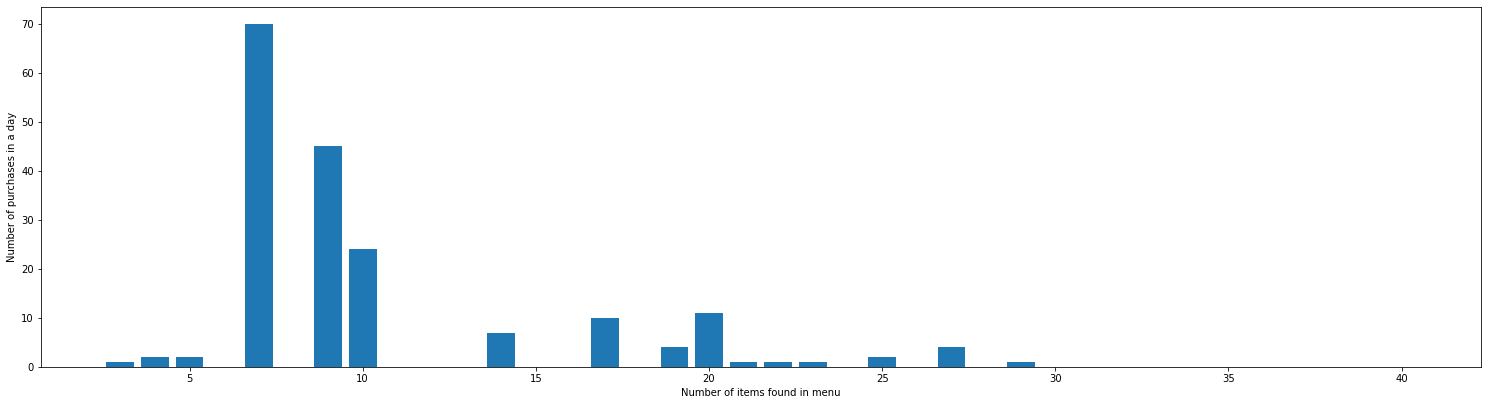

In [5]:
"""
From the following graph, we observe that restaurants with low number of items on their menu encounter
lower number of purchases. On the other end of the extreme, restaurants with high number of items of their
menu encounter also encounter low number of purchases. The optimal number of items on menu that receives
highest number of purchases seem to be 7 items.
"""

"""
Plotly Version
"""

# fig = px.bar(fake_customer_data, height=300, labels={'value':'Number of purchases in a day'})
# fig.show()

"""
Matplotlib Version
"""

fig = plt.figure()
fig.set_size_inches(20, 5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of purchases in a day')
ax.set_xlabel('Number of items found in menu')
langs = fake_customer_data.index
students = fake_customer_data["Purchase"]
ax.bar(langs,students)
plt.show()

## Predictive Analytics

In this section, We will build a model based off our artificially generated dataset to be able to predict the purchase probability based on number of options given to consumers.

#### TODO:

- How to do it such that theres different combinations of food everytime? (randomizer?)

- Add more constraints to increase customizability/randomness of output (e.g. Carbon Footprint)

In [6]:
"""
Import Libaries
"""

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [7]:
"""
Import dataset and prepare training/testing data
"""

customer_data = pd.read_csv('faked_purchase_dataset.csv')
y = pd.DataFrame(customer_data["Purchase"])
x = pd.DataFrame(customer_data[["Number of items on menu"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=SEED, test_size = 0.1)

In [8]:
"""
Train and fit decision tree (CART)
"""

dectreex1 = DecisionTreeClassifier(max_depth = 3)
dectreex1.fit(x_train, y_train)

treedot = export_graphviz(dectreex1, feature_names = x_train.columns, class_names = True, out_file = None, filled = True, rounded = True, special_characters = True)      
graphviz.Source(treedot)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [9]:
"""
Evaluate performance of Decision Tree using classification accuracy
"""

y_train_pred = dectreex1.predict(x_train)
y_test_pred = dectreex1.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9477777777777778

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94



In [10]:
def was_there_a_purchase(value):
    if value == 1: return "will"
    else: return "will not"

NUMBER_OF_ITEMS_ON_MENU = 1
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

NUMBER_OF_ITEMS_ON_MENU = 8
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

NUMBER_OF_ITEMS_ON_MENU = 30
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

SALAD_STOP = 38
salad_stop_prediction_arr = np.array([[SALAD_STOP]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer {} have made a purchase at a Salad Stop with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), SALAD_STOP))

Particular customer will not have made a purchase at a restautant with 1 items!
Particular customer will have made a purchase at a restautant with 8 items!
Particular customer will not have made a purchase at a restautant with 30 items!
Particular customer will not have made a purchase at a Salad Stop with 38 items!


## Prescriptive Analytics

In this section, we will propose our solution to help Salad Stop's customer to create a salad based on their
preference without them having to make any selections while still allowing Salad Stop to profit. Our solution is 
a linear optimization model which aims to suggest a salad based on a customer's preferences or constraints while
allowing Salad Stop as a business to maximize their profits

In [11]:
"""
Import Libaries
"""

from rsome import ro
from rsome import grb_solver as grb

In [12]:
"""
Data Preparation: All information obtained regarding Salad Stop was directly scrapped from their 
website https://www.saladstop.com.sg/
"""

data1 = pd.read_csv('menu.csv')
header1 = data1.columns

print("Shape of dataset: {} rows, {} columns".format(data1.shape[0], data1.shape[1]))

Shape of dataset: 88 rows, 25 columns


In [13]:
"""
We will be artificially setting the total quantity available of each ingredient and dynamically change it
after every order is generated later on
"""

ORIGINAL_QTY = 5

data1['Total'] = ORIGINAL_QTY
print("Total number of ingredients is {} and should be {}".format(sum(data1['Total']), data1.shape[0] * ORIGINAL_QTY))

Total number of ingredients is 440 and should be 440


In [14]:
"""
Final dataset we will use
"""

data1.head()

,Ingredient,Ingredient_type,Price,Serving_size,COGS,"per (g, pcs, unit)",COGS_per_serving,Adjusted_COGS_per_serving (if needed),Calories,Carbohydrates,...,Carbon_footprint,Vegan,Vegetarian,Gluten,Dairy,Nuts,Spicy,Sources,Unnamed: 24,Total
0,Red & White Cabbage,Standard Base,NaN,90,6.45,1100.0,0.53,NaN,26,3.4,...,0.064,1,1,0,0,0,0,https://omni.fairprice.com.sg/category/fruits-...,NaN,5
1,Romaine,Standard Base,NaN,120,3.10,200.0,1.86,0.86,20,4.0,...,0.033,1,1,0,0,0,0,https://omni.fairprice.com.sg/search?query=rom...,NaN,5
2,Kale,Premium Base,NaN,90,5.00,120.0,3.75,1.75,32,4.0,...,0.022,1,1,0,0,0,0,https://omni.fairprice.com.sg/product/vegeponi...,NaN,5
3,Baby Spinach,Premium Base,NaN,90,1.25,200.0,0.56,1.56,21,3.3,...,0.029,1,1,0,0,0,0,https://omni.fairprice.com.sg/product/kok-fah-...,NaN,5
4,Wholemeal Wrap,Wrap,NaN,100,3.55,360.0,0.99,NaN,297,54.8,...,0.180,0,1,0,0,0,0,https://www.fairprice.com.sg/product/fairprice...,NaN,5


In [15]:
"""
Generate salad based on user's input:

Details on Salad Stop:
Link: https://www.saladstop.com.sg/cyo/
1. Choose either premium base or standard base (standard base includes wrap and grain bowls)
2. Choose 2 dressing
3. Choose 7 standard toppings (even if you chose premium base)
4. Can add as many premium toppings as you want but will have additional charges
"""

def generate_salad(user_input, data_input, ingredient_qty, exclusion_list):
    
    try:
    
        '''
        Construct Optimizer.
        '''
        model = ro.Model('Salad selector model')

        '''
        Other variables to be used later:
        n refers to the total number of ingredients offered by salad stop
        '''
        n = len(data_input["ingredient"])

        '''
        Initialize Decision Variables
        x is the selection of an ingredient in the salad (binary variables)
        s is the standard base selection (binary variable)
        t is the premium base selection (binary variable)
        '''
        x = model.dvar(n, vtype='B')
        s = model.dvar((1,), vtype='B')
        t = model.dvar((1,), vtype='B')

        '''
        Create Objective Function:
        To maximize the profit to be earned by Salad Stop while meeting the constraints of the customer.
        '''
        model.max((9.9*s + 11.9*t + sum(x[i]*data_input["price"][i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping'])) - (sum(x[i]*data_input["cost"][i] for i in range(n))))

        '''
        Constraints 1: Optimizer will not select ingredient with 0 quantity left 
        '''
        model.st(sum(x[i] for i in range(n) if ingredient_qty[i] == 0) == 0)

        '''
        Constraints 2: Depending on the base selected, ingredients should be of the same category as the type of base selected
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Standard Base', 'Wrap', 'Grain Bowl']) == s)
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Base']) == t)

        '''
        Constraints 3: Ensure that either standard base is selected or premium base selected. Cannot be neither selected or both selected
        '''
        model.st(0 <= s <= 1)
        model.st(0 <= t <= 1)
        model.st(s + t == 1)

        '''
        Constraints 4: Ensure that only exactly 7 toppings unless the user wants more will be chosen
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Standard Topping']) == 7)

        '''
        Constraints 5: Ensure that only exactly 2 dressings unless the user wants more will be chosen
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Dressing (Asian)', 'Dressing (Western)']) == 2)

        '''
        Constraints 6: Ensure that the selection of ingredients meets nutrition requirements of user
        '''
        nutrition_list = [data_input["calories"], data_input["carbs"], data_input["protein"], data_input["fat"], data_input["sugar"]]
        for j in range(len(nutrition_list)):
            nutri =  nutrition_list[j]
            model.st(user_input["min_nutrition"][j] <= sum(x[i]*nutri[i] for i in range(n)))
            model.st(sum(x[i]*nutri[i] for i in range(n)) <= user_input["max_nutrition"][j])

        '''
        Constraints 7: Ensure that the dietary needs of user is met
        '''
        reqs = [data_input["vegan"], data_input["vegetarian"], data_input["gluten"], data_input["dairy"], data_input["nuts"], data_input["spicy"]]
        for k in range(len(user_input["dietary_req"])):
            req_type = reqs[k]
            if user_input["dietary_req"][k] == 0:
                model.st(sum(x[i] for i in range(n) if req_type[i] == 1) == 0 )

        '''
        Constraints 8: Ensure that the number of premium toppings meet user requirements
        '''
        model.st(sum(x[i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping']) <= user_input["max_num_of_premium_toppings"])

        '''
        Constraints 9: Ensure that the total cost of the salad is within the user's budget
        '''
        model.st((9.9*s + 11.9*t + sum(x[i]*price[i] for i in range(n) if data_input["ingredient_type"][i] in ['Premium Topping'])) <= user_input["budget"])

        '''
        Constraints 10: Ensure that the total cost of the salad is within the user's budget
        '''
        model.st(x >= 0)
        
        '''
        Constraints 11: Randomizer constraint which forces the model to generate a combination of salad which is unlike the previous combination
        '''
        for z in range(len(exclusion_list)):
            model.st(sum(x[y] for y in range(n) if data_input["ingredient"][y] == exclusion_list[z]) == 0)
        
        '''
        Solve Model and generate results
        '''
        model.solve(grb)
        
        if int(s.get()[0]) == 1:
            base = 9.9
        else:
            base = 11.9

        return x.get(), model.get(), base
    
    except:

        return [], 0, 0

In [16]:
"""
Set user requirements
"""

user_input = {
    "min_nutrition": np.array([450, 30, 20, 0, 0]), # calories, carbs, protein, fat, sugar
    "max_nutrition": np.array([500, 500, 30, 10, 10]),
    "budget" : 17,
    "max_num_of_premium_toppings": 3,
    "dietary_req": [1,1,1,1,1,1] # vegan, vegetarian, gluten, dairy, nuts, spicy
}

In [17]:
"""
Set dataset values
"""

data = data1.values

ingredient, ingredient_type, price, cost, calories, carbs, protein, fat, sugar =\
data[:,0], data[:,1], data[:,2], data[:,6], data[:,8], data[:,9], data[:,10], data[:,11], data[:,12]

vegan, vegetarian, gluten, dairy, nuts, spicy =\
data[:,-9], data[:,-8], data[:,-7], data[:,-6], data[:,-5], data[:,-4]

data_input = {
    "ingredient": ingredient,
    "ingredient_type": ingredient_type,
    "price": price,
    "cost": cost,
    "calories": calories,
    "carbs": carbs,
    "protein": protein,
    "fat": fat,
    "sugar": sugar,
    "vegan": vegan,
    "vegetarian": vegetarian,
    "gluten": gluten,
    "dairy": dairy,
    "nuts": nuts,
    "spicy": spicy,
}

In [18]:
"""
Randomizer to "force" different combinations.
"""

randomizer = []

In [19]:
"""
Test our optimizer
"""

total = data[:,-1]
total[-1] = 0

for j in range(15):
    
    response, cost, base = generate_salad(user_input, data_input, total, randomizer)
    
    randomizer = []
    
    if base == 0:
        print("Cannot make a salad... Impossible set of constraints")
    
    else:
        print("\n============== RECEIPT ==============\n")
        print("Purchase: \n")
        total_cost = 0
        total_cost += base
        for i in range(len(response)):
            if response[i] > 0:
                
                randomizer.append(ingredient[i])
                
                index = np.where(data_input["ingredient"] == ingredient[i])[0][0]
                
                print("{}, {}".format(ingredient[i], data_input["ingredient_type"][index]))
                
                if data_input["ingredient_type"][index] == "Premium Topping":
                    total_cost += data_input["price"][index]
                
                if total[i] > 0:
                    total[i] -= 1

        print("\n")
        print("Customer #{}, base price: {}".format(j, base))
        print("Cost of salad: ${}".format(round(total_cost,2)))
        print("Profit from salad: ${}".format(round(cost,2)))
        print("Amount of ingredients left: {}".format(sum(total)))
        print("\n=====================================\n")

Restricted license - for non-production use only - expires 2023-10-25
Being solved by Gurobi...
Solution status: 2
Running time: 0.0407s

============== RECEIPT ==============

Purchase: 

Quinoa, Grain Bowl
Green Apple, Standard Topping
Soba Noodles, Standard Topping
Potato, Standard Topping
Black Beans, Standard Topping
French Beans, Standard Topping
Red Onions, Standard Topping
Carrot, Standard Topping
Thai Asparagus, Premium Topping
Smoked Salmon, Premium Topping
Whole Eggs, Premium Topping
Salt & Pepper, Dressing (Western)
Tabbasco Sauce, Dressing (Western)


Customer #0, base price: 9.9
Cost of salad: $16.9
Profit from salad: $11.76
Amount of ingredients left: 422


Being solved by Gurobi...
Solution status: 2
Running time: 0.0249s

============== RECEIPT ==============

Purchase: 

Tomato Wrap, Wrap
Pea Sprouts, Standard Topping
Sesame Seeds, Standard Topping
Furikake, Standard Topping
Lime Wedge, Standard Topping
Fresh Herbs, Standard Topping
Roasted Pumpkins, Standard Topping


C:\Users\qingy\anaconda3\lib\site-packages\rsome\grb_solver.py:63: UserWarning: No feasible solution can be found.
  warnings.warn('No feasible solution can be found.')


Being solved by Gurobi...
Solution status: 4
Running time: 0.0040s
Cannot make a salad... Impossible set of constraints
Being solved by Gurobi...
Solution status: 4
Running time: 0.0040s
Cannot make a salad... Impossible set of constraints
Being solved by Gurobi...
Solution status: 4
Running time: 0.0040s
Cannot make a salad... Impossible set of constraints
Being solved by Gurobi...
Solution status: 4
Running time: 0.0040s
Cannot make a salad... Impossible set of constraints


### Problem 2: Optimise order of ingredients based on historical demand

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
Demand_data = pd.read_csv("demand.csv")
d = Demand_data.set_index('Date').T
scaler = MinMaxScaler(feature_range=(0,1))
d = scaler.fit_transform(d)

train_size = int(int(len(d)) * 0.7)
test_size = len(d) - train_size
v_train_size = int(train_size * 0.7)
v_validation_size = train_size - v_train_size

train, validation, test = d[0:v_train_size,:], d[v_train_size:train_size,:], d[train_size:len(d),:]

In [22]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
trainX, trainY = create_dataset(train, 5)
valX, valY = create_dataset(validation, 5)
testX, testY = create_dataset(test, 5)

In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))

In [25]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=50, batch_size=100, validation_data=(testX, testY), shuffle=False)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.2163 - val_loss: 0.1673
Epoch 2/50
1/1 [==============================] - 0s 45ms/step - loss: 0.2074 - val_loss: 0.1592
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 0.1994 - val_loss: 0.1521
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 0.1923 - val_loss: 0.1453
Epoch 5/50
1/1 [==============================] - 0s 44ms/step - loss: 0.1861 - val_loss: 0.1385
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 0.1799 - val_loss: 0.1317
Epoch 7/50
1/1 [==============================] - 0s 45ms/step - loss: 0.1737 - val_loss: 0.1249
Epoch 8/50
1/1 [==============================] - 0s 45ms/step - loss: 0.1675 - val_loss: 0.1181
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 0.1614 - val_loss: 0.1113
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 0.1560 - val_loss: 0.1045
Epoch 11/50
1/1 [==============

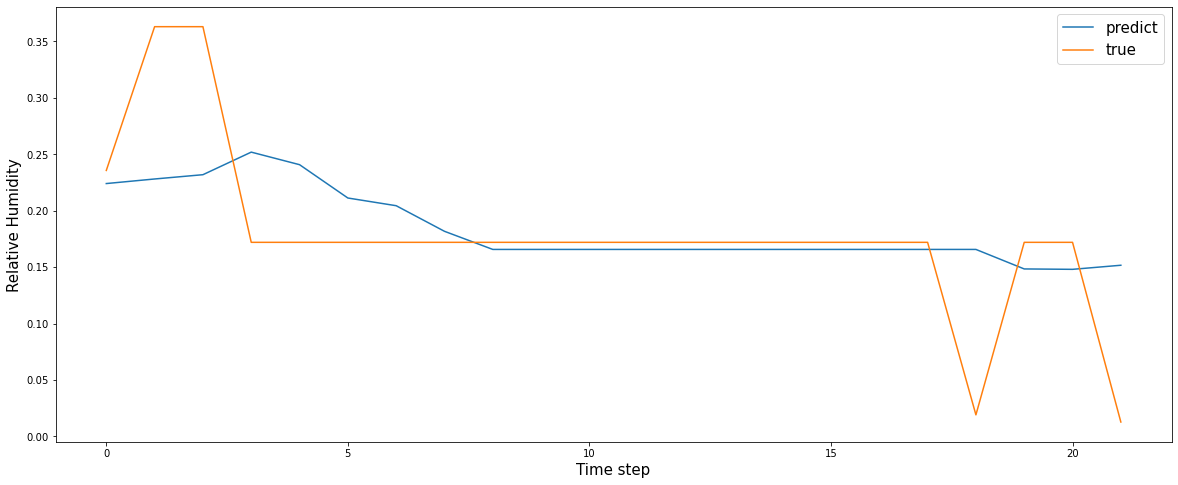

In [26]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

yhat = model.predict(testX)
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()

pyplot.ylabel('Relative Humidity', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)

pyplot.show()

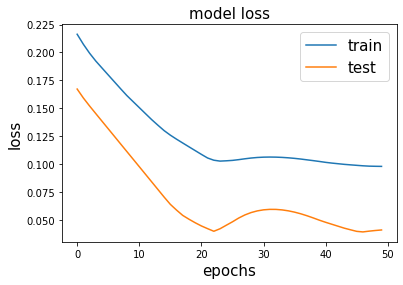

In [27]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.legend()

pyplot.title('model loss',size=15)
pyplot.ylabel('loss',size=15)
pyplot.xlabel('epochs',size=15)
pyplot.legend(loc='upper right',fontsize=15)

pyplot.show()

In [28]:
testScore = math.sqrt(mean_squared_error(testY, yhat))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.06 RMSE


In [34]:
Demand = pd.read_csv("demand.csv")
Demand = Demand.set_index('Date')
d = Demand
# demand_train, demand_test = train_test_split(d, test_size=0.3)
demand_train = d.tail(14)

In [35]:
"""
9.9: 2 Dressing + 7 Ingredient + 1 Standard Base
11.9: 2 Dressing + 7 Ingredient + 1 Premium Base

Assume that the price of each element is constant, hence:
1 Dressing: 0.99
1 Ingredient: 0.99
1 Standard Base: 0.99

Then Premium base would be the cost of standard base + the difference between premium base and standard base, hence:
1 Premium Base: 2.99
"""

Param_data = pd.DataFrame().assign(Ingredient=data1['Ingredient'], COGS=data1['COGS_per_serving'], Ingredient_Type=data1['Ingredient_type'], Additional_Price_For_Premium_Toppings=data1['Price'])
Param_data['Price'] = None
Param_data['Space'] = None

for i in range(Param_data.shape[0]):
    if Param_data["Ingredient_Type"][i] in ["Standard Base", "Wrap", "Grain Bowl", "Standard Topping", "Dressing (Western)", "Dressing (Asian)"]:
        Param_data["Price"][i] = 0.99
    elif Param_data["Ingredient_Type"][i] in ["Premium Base"]:
        Param_data["Price"][i] = 2.99
    elif Param_data["Ingredient_Type"][i] in ["Premium Topping"]:
        Param_data["Price"][i] = 0.99 + Param_data["Additional_Price_For_Premium_Toppings"][i]
        
    Param_data["Space"][i] = round(random.uniform(0, 1), 2)
        
Param_data = Param_data.set_index('Ingredient').T
Param_data

<ipython-input-35-865090e2e75f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Param_data["Price"][i] = 0.99
<ipython-input-35-865090e2e75f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Param_data["Space"][i] = round(random.uniform(0, 1), 2)
<ipython-input-35-865090e2e75f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Param_data["Price"][i] = 2.99
<ipython-input-35-865090e2e75f>:24: SettingWithCopyWarning: 
A value is tryin

Ingredient,Red & White Cabbage,Romaine,Kale,Baby Spinach,Wholemeal Wrap,Spinach Wrap,Tortilla Wrap,Tomato Wrap,Cauliflower Rice,Quinoa,...,Classic Caesar,Honey Dijon,Lemon & Oil,Mixed Berries Vinaigrette,Olive Oil,Salt & Pepper,Smoked Pimento,Smoky Ranch,Tabbasco Sauce,Placeholder
COGS,0.53,1.86,3.75,0.56,0.99,1.4,0.79,0.67,1.47,1.01,...,0.83,0.75,1.19,0.75,0.34,0.29,1.07,0.85,0.25,0
Ingredient_Type,Standard Base,Standard Base,Premium Base,Premium Base,Wrap,Wrap,Wrap,Wrap,Grain Bowl,Grain Bowl,...,Dressing (Western),Dressing (Western),Dressing (Western),Dressing (Western),Dressing (Western),Dressing (Western),Dressing (Western),Dressing (Western),Dressing (Western),Placeholder
Additional_Price_For_Premium_Toppings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0.99,0.99,2.99,2.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,None
Space,0.24,0.83,0.18,0.95,0.96,0.9,0.74,0.84,0.56,0.72,...,0.4,0.43,0.17,0.79,0.57,0.44,0.34,0.01,0.72,0.91


In [36]:
Demand = np.array( demand_train.values[:,1:demand_train.shape[1]].astype(int) )
price = np.array( Param_data.values[3,1:demand_train.shape[1]].astype(np.float64) )
cost = np.array( Param_data.values[0,1:demand_train.shape[1]].astype(np.float64) )
space = np.array( Param_data.values[4,1:demand_train.shape[1]].astype(np.float64) )
total_space = 300

In [37]:
def Multi_Newsvendor_Emp(p,c,D,s,C):
    K,N = D.shape
    mnv = ro.Model('Multi_Newsvendor')
    x = mnv.dvar(N)
    t = mnv.dvar( (K,N) )
    mnv.max( 1/K*( (t @ p).sum() ) - c @ x )
    mnv.st( t[:,i] <= x[i] for i in range(N) )
    mnv.st( t <= D )
    mnv.st( s @ x <= C )
    mnv.st( x >= 0)
    mnv.solve(grb, display = True)
    return x.get(), mnv.get()

In [38]:
order_emp, profit_emp = Multi_Newsvendor_Emp(price,cost,Demand,space,total_space)
print('The optimal order quantity is:', order_emp )
print('-------------------------------------')
print('And the corresponding expected profit is:', profit_emp )

Being solved by Gurobi...
Solution status: 2
Running time: 0.0321s
The optimal order quantity is: [ 0.          0.         11.          0.          0.          0.
  0.          0.          0.         25.          0.         23.
  0.          0.          0.         34.         26.          0.
 11.81578947  0.          0.          0.         35.          0.
  0.          0.          0.          0.         42.          0.
  0.         49.          0.         41.          0.         48.
  0.          0.          0.         48.         40.         47.
 40.         27.         29.          0.         27.         17.
 22.         22.          0.          0.         26.          0.
 24.          0.         16.         19.          0.         32.
 28.         25.          0.         16.         16.         21.
  0.          0.          0.          0.          0.         16.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.     